# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [2]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков
import plotly.express as px

%matplotlib inline

Прочитаем исходные данные:

In [211]:
data = pd.read_csv('data/unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

Text(0, 0.5, 'Пористость')

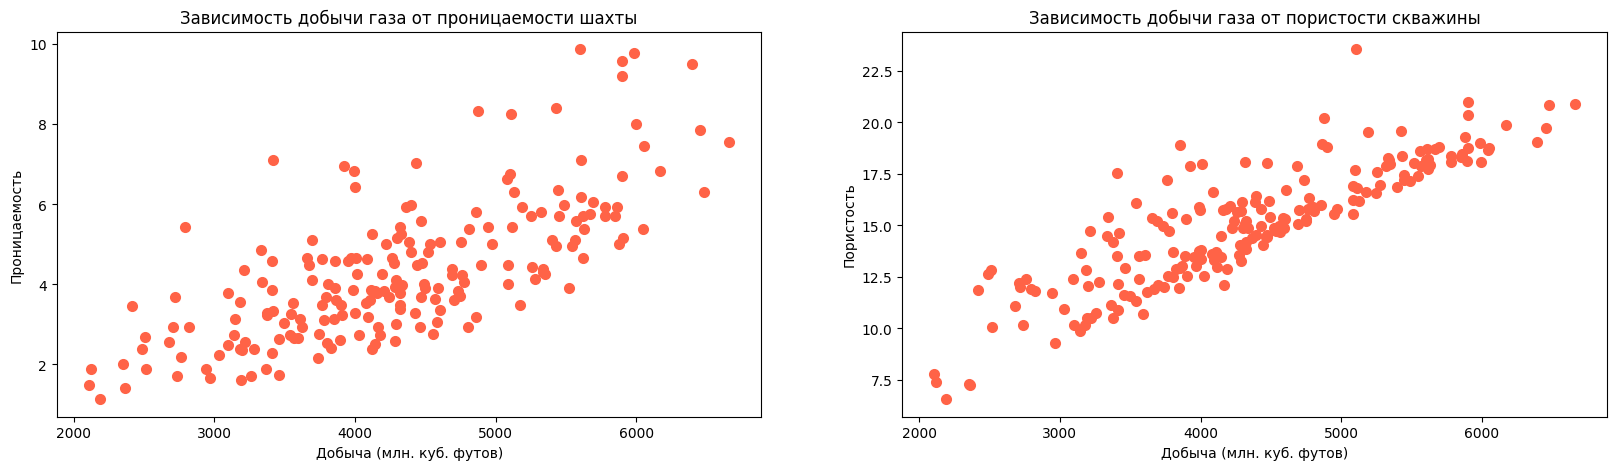

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
axes[0].scatter(
    data["Prod"],
    data["Perm"],
    color="tomato",
    lw=2,
)
axes[0].set_title("Зависимость добычи газа от проницаемости шахты")
axes[0].set_xlabel('Добыча (млн. куб. футов)')
axes[0].set_ylabel('Проницаемость')

axes[1].scatter(
    data["Prod"],
    data["Por"],
    color="tomato",
    lw=2,
)
axes[1].set_title("Зависимость добычи газа от пористости скважины")
axes[1].set_xlabel('Добыча (млн. куб. футов)')
axes[1].set_ylabel('Пористость')


На основе получившихся графиков можно сделать что показатель добычи газа напрямую зависит от пористости и проницаемости шахты.<br> 
К сожалению, остальные показатель сравнить не предстваляется возможности, так как нет знаний в области определий газовой отрасли

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [54]:
corr_data = data.corr()


fig = px.density_heatmap(
    corr_data,
    x=corr_data.columns,
)
fig.show()

In [55]:
display(corr_data)
print('Ранг матрицы', np.linalg.matrix_rank(corr_data))
print('Определитель матрицы', np.linalg.det(corr_data))

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
Well,1.000000,0.068927,0.077928,0.041483,-0.079252,0.022624,-0.007279,0.026817
Por,0.068927,1.000000,0.760546,-0.461549,-0.218570,0.711831,0.111860,0.861910
Perm,0.077928,0.760546,1.000000,-0.239636,-0.124017,0.471746,0.051023,0.727426
AI,0.041483,-0.461549,-0.239636,1.000000,0.127599,-0.531864,0.499143,-0.390835
Brittle,-0.079252,-0.218570,-0.124017,0.127599,1.000000,-0.214282,0.317929,0.237155
TOC,0.022624,0.711831,0.471746,-0.531864,-0.214282,1.000000,0.299483,0.654445
VR,-0.007279,0.111860,0.051023,0.499143,0.317929,0.299483,1.000000,0.323182
Prod,0.026817,0.861910,0.727426,-0.390835,0.237155,0.654445,0.323182,1.000000


Ранг матрицы 8
Определитель матрицы 0.0007299388072652095


* Какие факторы сильнее всего коррелируют с целевой переменной?<br>
    Сильнее всего с целевой переменной коррелируют показатели пористости и проницаемости шахты (Por, Perm)<br>

* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?<br>
    Корреляционная матрица плохо обусловенной, так как её определитель близок к нулю<br>

* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? <br>
    Данные мультиколлениарны, ранг матрицы максимален, факторы формально линейно независимы и определитель корреляционной матрицы близок к 0<br>

* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? <br>
    Мультиколлинеарность усложняет интерпретацию параметров регрессии, так как они теряют смысл.<br>

### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [62]:
# Составляем матрицу признаков с интерцептором
A = np.column_stack((np.ones(200), data[['Well', 'Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR']]))
# Составляем вектор целевой переменной
y = data[['Prod']]
# Считаем оценку коэффициентов модели
w_hat=np.linalg.inv(A.T@A)@A.T@y
print('Оценка коэффициентов модели', round(w_hat))

Оценка коэффициентов модели      Prod
0 -1232.0
1     0.0
2   230.0
3   116.0
4  -365.0
5    25.0
6   -78.0
7   785.0


* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?<br>
    Признак Well, который является номером скважины является неифнормативным, чтобы сделать вывод о неинформативности других призаков необходимо произвести стандратизацию признаков и уже после провести оценку коэффициентов модели<br>

* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.<br>
    Значение коэффициента оценки модели w_i означает, на сколько в среднем изменится медианная добыча (млн. кубических футов) при увеличении на 1. Например, при изменении пористости скважины 'Por' на 1%, то медианная добыча (в среднем) увеличиться на 230 млн. кубических футов. Тогда как изменение общего органического углерода на 1%, медианная добыча (в среднем) уменьшиться на 78 млн. кубических футов.

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [127]:
# [интерсептор, 'Well', 'Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR']
new_data = np.array([1, 106.0, 15.32, 3.71, 3.29, 55.99, 1.35, 2.42])
prod_real = 4748.315024
prod_new = (new_data@w_hat).values
print('Прогноз добычи Prod для новых данных', prod_new)
print('Абсолютная ошибка', prod_real - prod_new)

# Составляем матрицу обучающего набора данных вместе с интерцептором
data_with_interceptor = np.column_stack((np.ones(200), data[['Well', 'Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR']]))
data_copy = data.copy()
# Получаем колонки Prod_Forecast - прогноз по добыче на основе получивших коэф оценки и 
# Prod_Absolute - абсолютная ошибка между реальным значением и спрогнозированным
data_copy['Prod_Forecast'] = data_with_interceptor@w_hat
data_copy['Prod_Absolute'] = data_copy['Prod'] - data_copy['Prod_Forecast']
print('Средняя абсолютная ошибка MAE', sum(abs(data_copy['Prod'] - data_copy['Prod_Forecast'])) / data_copy.shape[0])
print('Средняя абсолютная процентная ошибка MAPE', round((sum((abs(data_copy['Prod'] - data_copy['Prod_Forecast'])) / abs(data_copy['Prod'])) / data_copy.shape[0]) * 100, 2))

Прогноз добычи Prod для новых данных [4723.06405371]
Абсолютная ошибка [25.25097029]
Средняя абсолютная ошибка MAE 153.62297086558195
Средняя абсолютная процентная ошибка MAPE 3.63


На основе полученных ошибок можно сделать вывод, что полученные коэффициенты оценки модели позволяют прогнозировать значения добычи с точностью в среднем +-155 (млн. куб. футов)

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

In [183]:
print('Таблица коэффициентов корреляции')
display(corr_data)
print('Таблица оценки коэффициентов модели')
display(w_hat[1:])

Таблица коэффициентов корреляции


,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
Well,1.000000,0.068927,0.077928,0.041483,-0.079252,0.022624,-0.007279,0.026817
Por,0.068927,1.000000,0.760546,-0.461549,-0.218570,0.711831,0.111860,0.861910
Perm,0.077928,0.760546,1.000000,-0.239636,-0.124017,0.471746,0.051023,0.727426
AI,0.041483,-0.461549,-0.239636,1.000000,0.127599,-0.531864,0.499143,-0.390835
Brittle,-0.079252,-0.218570,-0.124017,0.127599,1.000000,-0.214282,0.317929,0.237155
TOC,0.022624,0.711831,0.471746,-0.531864,-0.214282,1.000000,0.299483,0.654445
VR,-0.007279,0.111860,0.051023,0.499143,0.317929,0.299483,1.000000,0.323182
Prod,0.026817,0.861910,0.727426,-0.390835,0.237155,0.654445,0.323182,1.000000


Таблица оценки коэффициентов модели


,Prod
1,0.050700
2,230.179140
3,116.239006
4,-365.202301
5,24.994370
6,-78.400929
7,785.259815


* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.<br>
    Этим фаткором является TOC

* Как вы считаете, с чем связано полученное противоречие результатов?<br>
    Это связано с тем что в данной модели есть другие признака/факторы, которые оказывают влияение на TOC, что в свою очередь оказывает влияние на целевую переменную 

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

In [227]:
# Удалим из нашей модели признак "Perm" и признак "Toc", так как онb имеют большую корреляцию с "Por". 
# Также удалим признак "Well", так как он не несет никакой информации для нас, что понятно из контекста и видно из корреляционных коэффициентов
data_copy = data.drop(['Perm', 'TOC', 'Well'], axis=1)
data_copy.corr()

,Por,AI,Brittle,VR,Prod
Por,1.000000,-0.461549,-0.218570,0.111860,0.861910
AI,-0.461549,1.000000,0.127599,0.499143,-0.390835
Brittle,-0.218570,0.127599,1.000000,0.317929,0.237155
VR,0.111860,0.499143,0.317929,1.000000,0.323182
Prod,0.861910,-0.390835,0.237155,0.323182,1.000000


In [226]:
A = np.column_stack((np.ones(200), data_copy[['Por', 'VR', 'AI', 'Brittle',]]))
# Составляем вектор целевой переменной
y = data_copy[['Prod']]

w_hat = np.linalg.inv(A.T@A)@A.T@y
print('Оценка коэффициентов модели')
display(round(w_hat))

# Получаем колонки Prod_Forecast - прогноз по добыче на основе получивших коэф оценки и 
# Prod_Absolute - абсолютная ошибка между реальным значением и спрогнозированным
data_copy['Prod_Forecast'] = A@w_hat
data_copy['Prod_Absolute'] = data_copy['Prod'] - data_copy['Prod_Forecast']
print('Средняя абсолютная ошибка MAE', round(sum(abs(data_copy['Prod'] - data_copy['Prod_Forecast'])) / data_copy.shape[0], 2))
print('Средняя абсолютная процентная ошибка MAPE', round((sum((abs(data_copy['Prod'] - data_copy['Prod_Forecast'])) / abs(data_copy['Prod'])) / data_copy.shape[0]) * 100, 2))

Оценка коэффициентов модели


,Prod
0,-1835.0
1,293.0
2,517.0
3,-200.0
4,28.0


Средняя абсолютная ошибка MAE 171.43
Средняя абсолютная процентная ошибка MAPE 4.04


* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее. <br>
Значение коэффициента оценки модели w_i означает, на сколько в среднем изменится медианная добыча (млн. кубических футов) при увеличении на 1. Например, при изменении пористости скважины 'Por' на 1%, то медианная добыча (в среднем) увеличиться на 293 млн. кубических футов. Тогда как изменение акустический импеданс на 1 единицу, медианная добыча (в среднем) уменьшиться на 200 млн. кубических футов.<br>

    Таблица 1. Сравнение коэффициентов оценки
    | Название | Было | Стало |
    |:----:|:----:|:----:|
    | Интрецептор  | -1231  | -1835  |
    | Por  | 230  | 293  |
    | VR   | 785  | 517  |
    | AI   | -365 | -200  |
    | Brittle | 25 | 28  |
<br>

* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее.<br>

С удалением признаков согласно заданию можно заметить увеличение ошибки, связано это может быть с несколькими причинами:<br>

1. Упущенная информация - коррелированные признаки могут представлять собой разные стороны одного и того же фактора и удаление одного признака может приводить к ухудшению точности всей модели. Пример: признаки "количество комнат" и "площадь кваритиры" могут сильно коррелировать, но оба важны для предсказания цены квартиры
2. Сложная (нелинейная) зависимость между признаками<br>
<br>
Таблица 2. Сравнение метрик
    | Название | Было | Стало |
    |:----:|:----:|:----:|
    | MAE  | 153.62  | 171.43  |
    | MAPE   | 3.63  | 4.04  |
<br>

* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?<br>
Побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции удалось, знаки при коэффициентах соответствуют друг другу

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [235]:
from sklearn.linear_model import LinearRegression
# создаём модель линейной регрессии
model = LinearRegression(fit_intercept=False)
# вычисляем коэффициенты регрессии
model.fit(A, y)
l_w_hat = model.coef_
print('w_hat:', l_w_hat)

# Повторяем действия из предыдущей ячейки
data_copy['Prod_Forecast'] = A@l_w_hat.T
data_copy['Prod_Absolute'] = data_copy['Prod'] - data_copy['Prod_Forecast']
print('Средняя абсолютная ошибка MAE', round(sum(abs(data_copy['Prod'] - data_copy['Prod_Forecast'])) / data_copy.shape[0], 2))
print('Средняя абсолютная процентная ошибка MAPE', round((sum((abs(data_copy['Prod'] - data_copy['Prod_Forecast'])) / abs(data_copy['Prod'])) / data_copy.shape[0]) * 100, 2))

w_hat: [[-1835.44646069   293.03624565   517.40272597  -200.03091206
     27.64098209]]
Средняя абсолютная ошибка MAE 171.43
Средняя абсолютная процентная ошибка MAPE 4.04


Сравните результаты библиотечной реализации с тем, что вы получили ранее<br>

Таблица 3. Сравнение коэффициентов оценки рассчитанных вручную и с помощью библиотеки
| Название | Вручную | LinearRegression |
|:----:|:----:|:----:|
| Интрецептор  | -1835  | -1835  |
| Por  | 293  | 293  |
| VR   | 517  | 517  |
| AI   | -200 | -200  |
| Brittle | 28 | 28  |


## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [288]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [371]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import cross_validate

In [417]:
# Создаем переменные в которых храняться данные с которыми будем работать дальше
A = data[['Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR']]
y = data[['Prod']] 

In [418]:
scaler = StandardScaler()
# подгоняем параметры стандартизатора (вычисляем среднее и СКО)
A = scaler.fit_transform(A)
# добавляем полиномиальные признаки
poly = PolynomialFeatures(degree=3, include_bias=True)
A_poly = poly.fit_transform(A)
print('Количество полиноминальных признаком', A_poly.shape[1])

# создаём модель линейной регрессии
lr = LinearRegression()
 
# оцениваем качество модели на кросс-валидации, метрика — MAPE
cv_results = cross_validate(lr, A_poly, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))
#Данные для вывода в 8.5
linear_model = np.array(['Linear Model', np.nan, True, round(-cv_results['train_score'].mean()* 100, 2), round(-cv_results['test_score'].mean() * 100, 2)])
 

Количество полиноминальных признаком 84
MAPE на тренировочных фолдах: 0.55 %
MAPE на валидационных фолдах: 1.89 %


Разница между MAPE высокая, больше чем в 3 раза

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [419]:
# Разделяем данные на обучающую и валидационную выборки
X_train, X_val, y_train, y_val = train_test_split(A_poly, y, test_size=0.2, random_state=42) 

# Создаем L1 регулязацию
lasso = Lasso()

# Задаем сетку значений alpha. 100 значений alpha от 10^-4 до 10^2
param_grid = {'alpha': np.logspace(-4, 2, 100)} 
# Создаем и обучаем GridSearchCV
# cv - количество фолдов для кросс-валидации, scoring - метрика
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error') 
grid_search.fit(X_train, y_train)
# Лучшее значение alpha
best_alpha = round(grid_search.best_params_['alpha'], 2)
print(f"Лучшее значение alpha: {best_alpha}")

lasso = Lasso(alpha=best_alpha, max_iter=10000)

# оцениваем качество модели на кросс-валидации
cv_results = cross_validate(lasso, A_poly, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))
#Данные для вывода в 8.5
lasso_model = np.array(['Lasso Model', f'Alpha = {best_alpha}', True, round(-cv_results['train_score'].mean()* 100, 2), round(-cv_results['test_score'].mean() * 100, 2)])

g:\PythonProject\Educational_Folder\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.697e+04, tolerance: 1.286e+04

g:\PythonProject\Educational_Folder\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.191e+04, tolerance: 1.332e+04

g:\PythonProject\Educational_Folder\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.435e+04, tolerance: 1.172e+04

g:\PythonProject\Ed

Лучшее значение alpha: 3.05
MAPE на тренировочных фолдах: 0.92 %
MAPE на валидационных фолдах: 1.34 %


Ошибка стала меньше, расхождение между MAPE на тренировочных фолдах и валидационных в районе 35%

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [420]:
# Разделяем данные на обучающую и валидационную выборки
X_train, X_val, y_train, y_val = train_test_split(A_poly, y, test_size=0.2, random_state=42) 

# Создаем L1 регулязацию
ridge = Ridge()

# Задаем сетку значений alpha. 100 значений alpha от 10^-4 до 10^2
param_grid = {'alpha': np.logspace(-4, 2, 100)} 
# Создаем и обучаем GridSearchCV
# cv - количество фолдов для кросс-валидации, scoring - метрика
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error') 
grid_search.fit(X_train, y_train)
# Лучшее значение alpha
best_alpha = round(grid_search.best_params_['alpha'], 2)
print(f"Лучшее значение alpha: {best_alpha}")

ridge = Ridge(alpha=best_alpha, max_iter=10000)

# оцениваем качество модели на кросс-валидации
cv_results = cross_validate(ridge, A_poly, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))
#Данные для вывода в 8.5
ridge_model = np.array(['Ridge Model', f'Alpha = {best_alpha}', True, round(-cv_results['train_score'].mean()* 100, 2), round(-cv_results['test_score'].mean() * 100, 2)])


Лучшее значение alpha: 0.66
MAPE на тренировочных фолдах: 0.65 %
MAPE на валидационных фолдах: 1.50 %


MAPE стала хуже по сравнению с предыдущей моделью, разцница между MAPE больше чем в 2 раза, но все равно лучше чем модель линейной регрессии

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [421]:
# Разделяем данные на обучающую и валидационную выборки
X_train, X_val, y_train, y_val = train_test_split(A_poly, y, test_size=0.2, random_state=42) 

# Создаем L1 регулязацию
elastic_net = ElasticNet()

# Задаем сетку значений alpha и lambda. 
# 100 значений alpha от 10^-4 до 10^2. 
# 100 значений l1_ratio от 0.1 до 1
param_grid = {
    'alpha': np.logspace(-4, 2, 10),  
    'l1_ratio': np.linspace(0.1, 1, 10)
}
# Создаем и обучаем GridSearchCV
# cv - количество фолдов для кросс-валидации, scoring - метрика
grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring='neg_mean_squared_error') 
grid_search.fit(X_train, y_train)
# Лучшее значение alpha
best_alpha = round(grid_search.best_params_['alpha'], 2)
best_l1_ratio = round(grid_search.best_params_['l1_ratio'], 2)
print(f"Лучшее значение alpha: {best_alpha}")
print(f"Лучшее значение l1_ratio: {best_l1_ratio}")

elastic_net = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, max_iter=10000)

# оцениваем качество модели на кросс-валидации
cv_results = cross_validate(elastic_net, A_poly, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))
elastic_net_model = np.array(['ElasticNet Model', f'Alpha = {best_alpha}, L1_ratio = {best_l1_ratio}', True, round(-cv_results['train_score'].mean()* 100, 2), round(-cv_results['test_score'].mean() * 100, 2)])

g:\PythonProject\Educational_Folder\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.253e+04, tolerance: 1.286e+04

g:\PythonProject\Educational_Folder\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.753e+04, tolerance: 1.332e+04

g:\PythonProject\Educational_Folder\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.952e+04, tolerance: 1.172e+04

g:\PythonProject\Ed

Лучшее значение alpha: 4.64
Лучшее значение l1_ratio: 1.0
MAPE на тренировочных фолдах: 0.99 %
MAPE на валидационных фолдах: 1.40 %


Примерно такие же значения ошибки как у модели с $L_1$-регуляризацией 

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [426]:
end_dataframe = pd.DataFrame(data=[linear_model, lasso_model, ridge_model, elastic_net_model], columns=['Model name', 'Hyperparameters', 'Polynomial Characteristics', 'MAPE trening folds', 'MAPE validation folds'])
end_dataframe

,Model name,Hyperparameters,Polynomial Characteristics,MAPE trening folds,MAPE validation folds
0,Linear Model,nan,True,0.55,1.89
1,Lasso Model,Alpha = 3.05,True,0.92,1.34
2,Ridge Model,Alpha = 0.66,True,0.65,1.5
3,ElasticNet Model,"Alpha = 4.64, L1_ratio = 1.0",True,0.99,1.4


Лучше всего по показателю MAPE показала себя **Lasso Model**, так как имеет наименьшее расхождение между тренировочная фолдами и валидационными